# Mobile Price analysis

This project specifies the various factors that effects the price range of mobiles. The data for this project is taken from www.kaggle.com and different python libraries such as matplotlib, pandas and numpy are used learnt from the course offered by jovian.com (Data Analysis with Python: Zero to Pandas

## Downloading the Dataset

the dataset would be downloaded using opendatasets from python.

In [91]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [92]:
dataset_url = 'https://www.kaggle.com/datasets/carlaaluvai/mobile-price-classification' 

In [93]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./mobile-price-classification" (use force=True to force download)


The dataset has been downloaded and extracted.

In [94]:
data_dir = './mobile-price-classification'

In [95]:
import os
os.listdir(data_dir)

['mobile_price.csv', '.ipynb_checkpoints']

Let us save and upload our work to Jovian before continuing.

In [96]:
project_name = "mobile-price-analysis" 

In [97]:
!pip install jovian --upgrade -q

In [98]:
import jovian

In [99]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "narayanikesari391/mobile-price-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/narayanikesari391/mobile-price-analysis


'https://jovian.ai/narayanikesari391/mobile-price-analysis'

## Data Preparation and Cleaning

reading the data and analyzing different aspects.



In [100]:
import pandas as pd
import numpy as np

In [101]:
data=pd.read_csv('./mobile-price-classification/mobile_price.csv')

In [102]:
mobile_df=data.copy()        #df=data frame

In [14]:
mobile_df

,battery_power,bluetooth,clock_speed,dual_sim,fc_megapixel,four_g,int_memory,m_depth,mobile_wt,n_cores,...,px_height,px_width,ram,screen_height,screen_width,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [15]:
mobile_df.shape

(2000, 21)

In [16]:
mobile_df.describe

<bound method NDFrame.describe of       battery_power  bluetooth  clock_speed  dual_sim  fc_megapixel  four_g  \
0               842          0          2.2         0             1       0   
1              1021          1          0.5         1             0       1   
2               563          1          0.5         1             2       1   
3               615          1          2.5         0             0       0   
4              1821          1          1.2         0            13       1   
...             ...        ...          ...       ...           ...     ...   
1995            794          1          0.5         1             0       1   
1996           1965          1          2.6         1             0       0   
1997           1911          0          0.9         1             1       1   
1998           1512          0          0.9         0             4       1   
1999            510          1          2.0         1             5       1   

      int_memory 

In [17]:
mobile_df.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'fc_megapixel',
       'four_g', 'int_memory', 'm_depth', 'mobile_wt', 'n_cores',
       'pc_megapixel', 'px_height', 'px_width', 'ram', 'screen_height',
       'screen_width', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range'],
      dtype='object')

In [18]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   bluetooth      2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc_megapixel   2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_depth        2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc_megapixel   2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  screen_height  2000 non-null   int64  
 15  screen_width   2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [19]:
import jovian

In [20]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "narayanikesari391/mobile-price-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/narayanikesari391/mobile-price-analysis


'https://jovian.ai/narayanikesari391/mobile-price-analysis'

## Exploratory Analysis and Visualization

Let's get to know the data and answer some questions.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Here's the heatmap that gives the correlation between each columns.

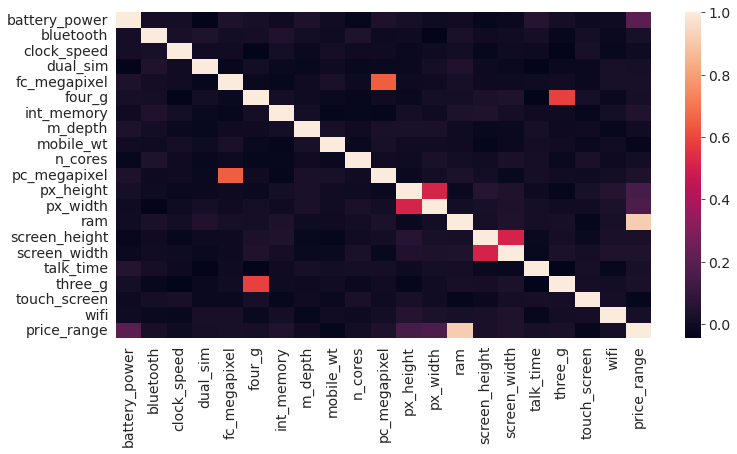

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(mobile_df.corr())
plt.show()

It suggests that the price_range has a very good relation with RAM whereas pixel_height,pixel_width and battery_power also have a good relation with price_range.

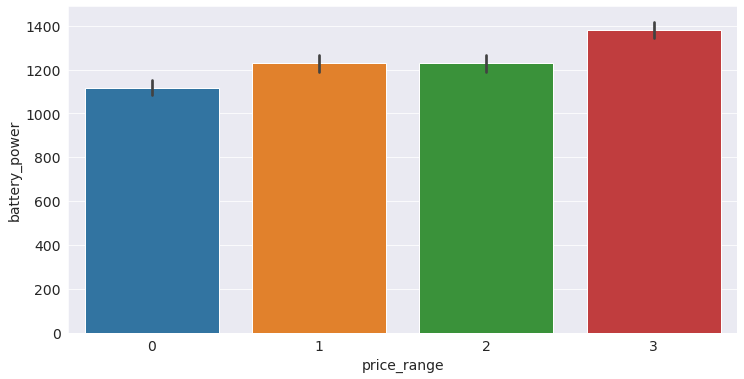

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x='price_range',y='battery_power',data=mobile_df)
plt.show()

As per the expectation mobiles with highest battery power will have the highest price range.

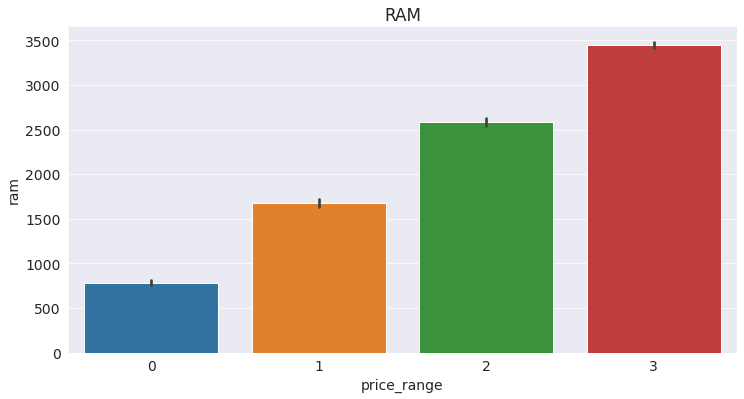

In [76]:
plt.figure(figsize=(12,6))
sns.barplot(x='price_range',y='ram',data=mobile_df)
plt.title('RAM');

High price range corresponds to high Random Access Memory.

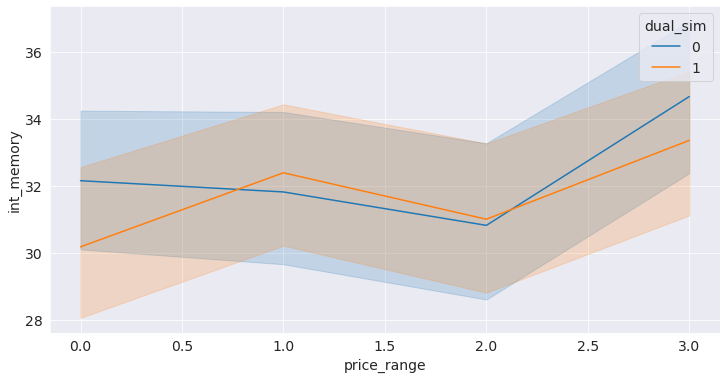

In [75]:
plt.figure(figsize=(12,6))
sns.lineplot(x='price_range',y='int_memory', data=mobile_df ,hue='dual_sim');

Mobiles which does not have dual sim facility,have high memory as well as less price compared to the mobiles which have dual sim but less memory.
On the other hand mobiles which are the costliest have good internal memory.

Let us save and upload our work to Jovian before continuing

In [77]:
import jovian

In [78]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "narayanikesari391/mobile-price-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/narayanikesari391/mobile-price-analysis


'https://jovian.ai/narayanikesari391/mobile-price-analysis'

## Asking and Answering Questions

Let's work on some related questions.



#### Q1: What is the effect of pixel height /width on price range?

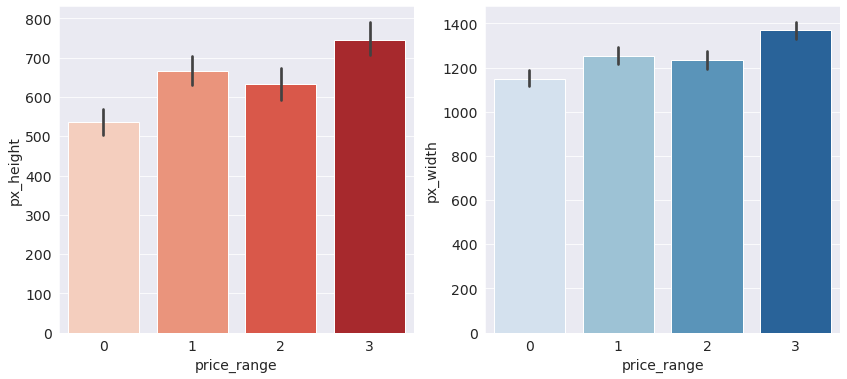

In [80]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x="price_range",y="px_height",data=mobile_df,palette='Reds')
plt.subplot(1,2,2)
sns.barplot(x="price_range",y="px_width",data=mobile_df,palette='Blues');

Mobiles with high pixel height and width have high price range.

#### Q2: What is the relation between price range and front camera?

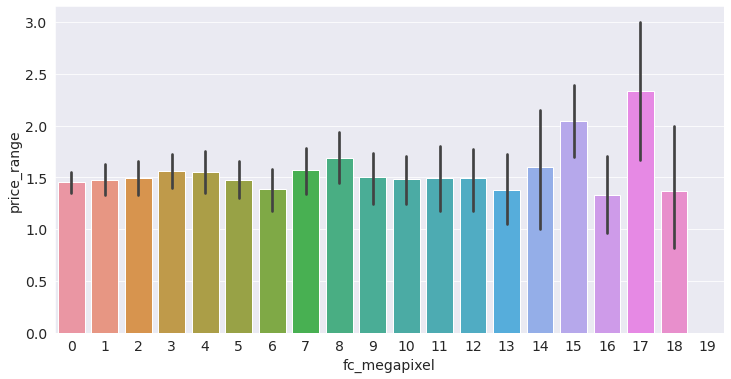

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(y="price_range",x="fc_megapixel",data=mobile_df);


Mobiles having 17 megapixel front camera has the highest price range.

#### Q3: How does the  3G and 4G features of mobiles effect the price?


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


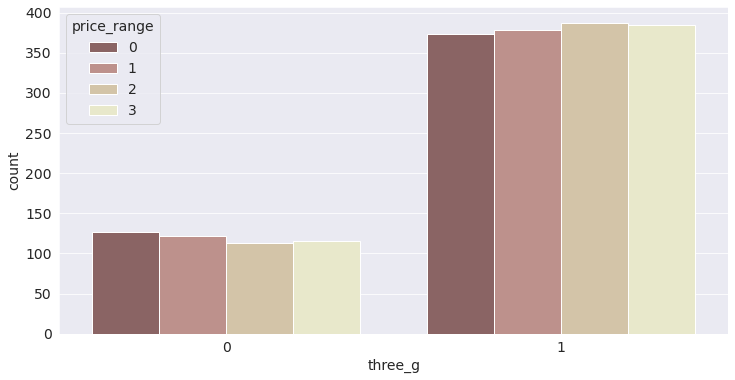

In [82]:
plt.figure(figsize=(12,6))

sns.countplot(mobile_df['three_g'] , hue=mobile_df['price_range'] , palette='pink');



/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='four_g', ylabel='count'>

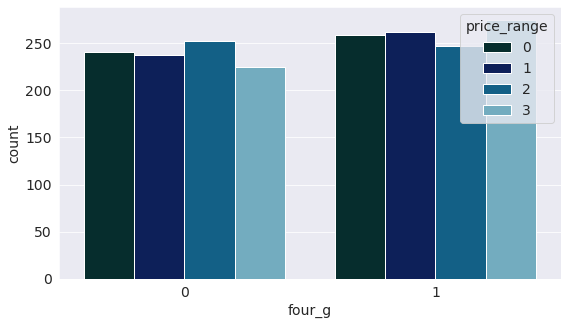

In [35]:
sns.countplot(mobile_df['four_g'] , hue=mobile_df['price_range'] , palette='ocean')

From both the graphs we can see that mobile which belong to 3G and 4G category are the costliest with compare to others.

#### Q4: Price range of mobile phone that have both WIFI  and bluetooth?

In [50]:
mobile_df['both']=np.where(mobile_df['wifi']==mobile_df['bluetooth'],1,0)


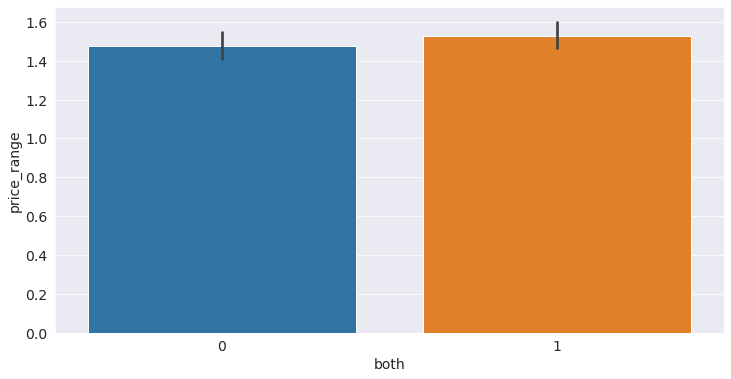

In [83]:
plt.figure(figsize=(12,6))
sns.barplot(x='both',y='price_range',data=mobile_df);

The price range of mobiles having both wifi and bluetooth facility does not vary much with compared to those which does not have both the features.

#### Q5: What is the longest time that a single battery charge will last

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

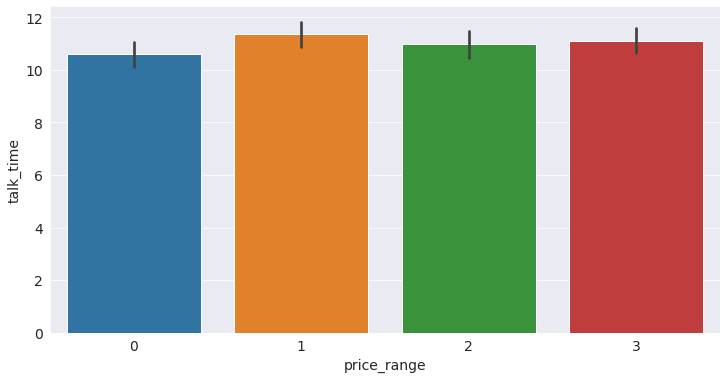

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(y='talk_time',x='price_range',data=mobile_df)

Mobiles having talk_time of more than 11 hrs does not cost much may be because it has other features less like camera quality,memory space,etc.

Let us save and upload our work to Jovian before continuing.

In [84]:
import jovian

In [85]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "narayanikesari391/mobile-price-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/narayanikesari391/mobile-price-analysis


'https://jovian.ai/narayanikesari391/mobile-price-analysis'

## Inferences and Conclusion

We can conclude that-

Mobiles with high RAM,high battery power and high internal memory will definitely corresponds to high price range.
But features like wifi,bluetooth,talk_time,dual sim,etc. would not much effect the price of mobile phones.

In [86]:
import jovian

In [87]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "narayanikesari391/mobile-price-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/narayanikesari391/mobile-price-analysis


'https://jovian.ai/narayanikesari391/mobile-price-analysis'

## References and Future Work

More focused projects can be done by collecting related or different data according to taste. links:- kaggle - 
https://www.kaggle.com/datasets/carlaaluvai/mobile-price-classification

In [88]:
import jovian

In [89]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "narayanikesari391/mobile-price-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/narayanikesari391/mobile-price-analysis


'https://jovian.ai/narayanikesari391/mobile-price-analysis'